In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as cPickle
import gzip

def npSoftmax(X):
    e = np.exp(X)
    return e/np.sum(e,axis=0,keepdims=True)

def prediction(Al, Ynum):
    arg = np.argmax(Al,axis=0)
    arg = arg.reshape(1,Ynum.shape[1])
    # print(arg.shape, Ynum.shape)
    cnt = 0
    # print("predicting")
    for i in range(Ynum.shape[1]):
        if(arg[0,i]==Ynum[0,i]):
            cnt = cnt+1
    return (cnt/Ynum.shape[1])

def para_init(n_X) :
    W = np.random.randn(10, n_X)*0.01
    b = np.zeros((10,1))

    return W, b

def update(X, W, b, A, Y, lr):
    m = Y.shape[1]
    dZ = A - Y
    dW = np.dot(dZ,X.T)/m
    db = np.sum(dZ,axis=1).reshape(10,1)/m

    W -= lr*dW
    b -= lr*db

    return W,b

def forward_prop(X, W, b):
    Z = np.dot(W,X) + b
    A = npSoftmax(Z)

    return Z, A

def costcomp(A, Y):
    c = np.sum(-1*(Y*np.log(A)))/Y.shape[1]
    return c


def learn(X, W, b, Y, Ynum, lr, num_iter, show):
    costs = []
    accs = []
    for i in range(num_iter):
        Z, A = forward_prop(X, W, b)
        W, b = update(X, W, b, A, Y, lr)
        costs.append(costcomp(A, Ynum))
        accs.append(100*prediction(A,Ynum))
        if show and i%10 == 0:
            print("Accuracy after ",i," Iterarions is : ",100*prediction(A,Ynum))

    plt.plot(costs)
    return W,b,accs,costs


data = gzip.open("/media/khurshed2504/Data/PycharmProjects/ML_temp0/mnist.pkl.gz")
train_data,  validation_data, test_data = cPickle.load(data,encoding="latin1")


X = train_data[0]
X = X.T
print("X Shape : ",X.shape)
n_X = X.shape[0]
m = X.shape[1]

Ynum = train_data[1]
print("Ynum Shape (Native) : ", Ynum.shape)
Ynum = Ynum.reshape(1, Ynum.shape[0])
print("Ynum Shape (After Reshape) : ", Ynum.shape)
print(Ynum)

print("Shape of Test Data : ", test_data[0].shape)
# Y = np.eye(10)[Ynum]
# print(Y.shape)
# Y = Y.squeeze()
# print(Y.shape)
# Y = Y.reshape(10,50000)
Y = np.zeros((10,m))
for i in range(m):
    Y[int(Ynum[0,i]),i]=1

W, b = para_init(n_X)

# for i in range(50):
#     Y1 = np.array(Y[:, 1000*(i):1000*(i+1)]).reshape(10, 1000)
#     X1 = np.array(X[:, 1000*(i):1000*(i+1)]).reshape(784, 1000)
#     Ynum1 = np.array(Ynum[:, 1000 * (i):1000 * (i + 1)]).reshape(1, 1000)
W,b,accs,costs = learn(X, W, b, Y, Ynum, lr = 0.1, num_iter = 1000, show = True)

X Shape :  (784, 50000)
Ynum Shape (Native) :  (50000,)
Ynum Shape (After Reshape) :  (1, 50000)
[[5 0 4 ... 8 4 8]]
Shape of Test Data :  (10000, 784)
Accuracy after  0  Iterarions is :  10.632
Accuracy after  10  Iterarions is :  75.996
Accuracy after  20  Iterarions is :  79.986
Accuracy after  30  Iterarions is :  81.896
Accuracy after  40  Iterarions is :  83.03
Accuracy after  50  Iterarions is :  83.812
Accuracy after  60  Iterarions is :  84.396
Accuracy after  70  Iterarions is :  84.918
Accuracy after  80  Iterarions is :  85.30799999999999
Accuracy after  90  Iterarions is :  85.66
Accuracy after  100  Iterarions is :  85.938
Accuracy after  110  Iterarions is :  86.168
Accuracy after  120  Iterarions is :  86.366
Accuracy after  130  Iterarions is :  86.55199999999999
Accuracy after  140  Iterarions is :  86.732
Accuracy after  150  Iterarions is :  86.902
Accuracy after  160  Iterarions is :  87.03999999999999
Accuracy after  170  Iterarions is :  87.164
Accuracy after  18

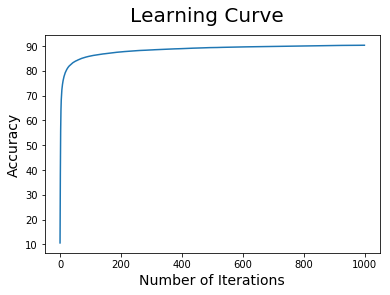

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Learning Curve', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.ylabel('Accuracy', fontsize = 14)
plt.plot(accs)

In [7]:
X_test = test_data[0]
X_test = X_test.T
Z, A = forward_prop(X_test, W, b)
Ynum_test = test_data[1]
#print("Ynum Shape (Native) : ", Ynum.shape)
Ynum_test = Ynum_test.reshape(1, Ynum_test.shape[0])
#print("Ynum Shape (After Reshape) : ", Ynum.shape)
#print(Ynum1)
print(A.shape)
print("Accuracy over Test Set is : ",100*prediction(A,Ynum_test))

(10, 10000)
Accuracy over Test Set is :  91.01


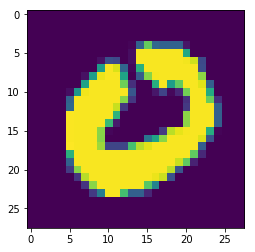

It is a :  0


In [8]:
index = 25
print()
x = X_test[:,index].reshape(784,1)
im = x.reshape(28,28)
plt.imshow(im)
plt.show()
Z, A = forward_prop(x, W, b)
print("It is a : ",np.argmax(A))

In [9]:
import pandas as pd
dfW = pd.DataFrame(W)
dfb = pd.DataFrame(b)
dfW.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/Only SoftMax Weights/Weight.csv",header=None,index=None)
dfb.to_csv("/media/khurshed2504/Data/PycharmProjects/ML_temp0/Only SoftMax Weights/Bias.csv",header=None,index=None)